In [92]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fastparquet
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Importação dos Dados

In [9]:
chunksize = 30000
dfs_train = []
with pd.read_csv('treino_309.csv', chunksize=chunksize) as reader:
    for chunk in reader:
        dfs_train.append(chunk)

In [12]:
chunksize = 30000
dfs_valid = []
with pd.read_csv('valid.csv', chunksize=chunksize) as reader:
    for chunk in reader:
        dfs_valid.append(chunk)

In [20]:
chunksize = 30000
dfs_test = []
with pd.read_csv('BASE-PREPROCESSED(TESTE).csv', sep='\t', chunksize=chunksize) as reader:
    for chunk in reader:
        dfs_test.append(chunk)

In [21]:
def create_split(dfs, target, drop_start):
    Xs = []
    ys = []
    for df in dfs:
        Xs.append(df[df.columns[drop_start:]])
        ys.append(df[[target]])
    
    return Xs, ys

In [22]:
Xs_train, ys_train = create_split(dfs_train, 'ALVO', drop_start=2)

In [23]:
Xs_test, ys_test = create_split(dfs_test, 'ALVO', drop_start=1)

# Primeiro Modelo: Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [106]:
forest = RandomForestClassifier(max_features=25, n_estimators=100, warm_start=True,random_state=0)

In [107]:
for X, y in zip(Xs_train, ys_train):
    #X.drop(['PROPHET_NORM_FEATURES'], inplace=True, axis=1)
    forest.fit(X, y)
    forest.n_estimators+=10

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_

In [108]:
accuracy = []
recall = []
precision = []
f1 = []
roc = []

for (X, y_test) in zip(Xs_test, ys_test):
    y_pred = forest.predict(X.drop(['PROPHET_NORM_FEATURES'], axis=1))
    accuracy.append(accuracy_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    roc.append(roc_auc_score(y_test, y_pred))

In [109]:
metrics_dict = {'Accuracy': np.mean(accuracy), 'Recall': np.mean(recall), 'Precision': np.mean(precision), 'F1': np.mean(f1), 'ROC-AUC': np.mean(roc)}

In [110]:
metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

<AxesSubplot:>

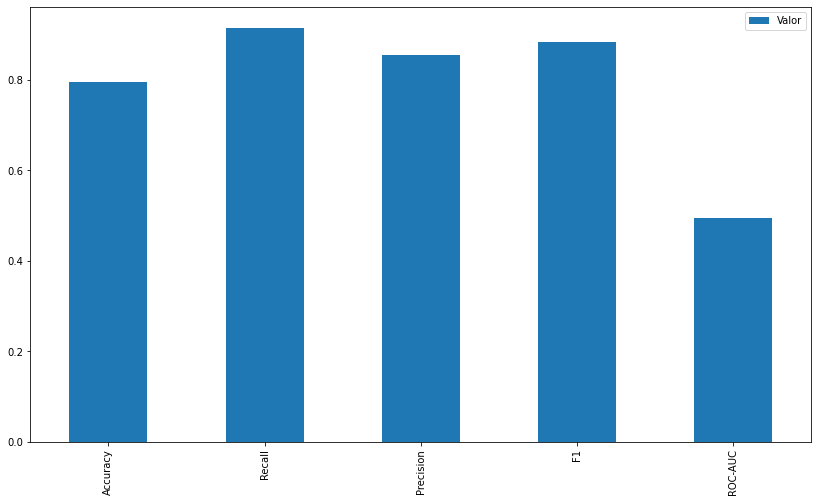

In [111]:
metrics_df.plot(kind='bar',figsize=(14,8))

# Gradient Boosting

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [115]:
gbrt = GradientBoostingClassifier(max_depth = 25, random_state=0, warm_start = True)

In [116]:
for X, y in zip(Xs_train, ys_train):
    #X.drop(['PROPHET_NORM_FEATURES'], inplace=True, axis=1)
    gbrt.fit(X, y)
    gbrt.n_estimators+=10

/home/sergio/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/sergio/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/sergio/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/sergio/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [117]:
accuracy = []
recall = []
precision = []
f1 = []
roc = []

for (X, y_test) in zip(Xs_test, ys_test):
    y_pred = gbrt.predict(X.drop(['PROPHET_NORM_FEATURES'], axis=1))
    accuracy.append(accuracy_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    roc.append(roc_auc_score(y_test, y_pred))

<AxesSubplot:>

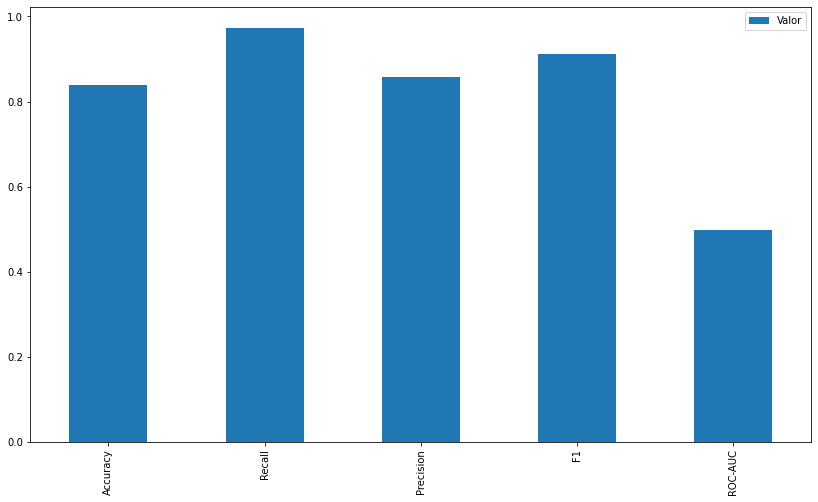

In [118]:
metrics_dict = {'Accuracy': np.mean(accuracy), 'Recall': np.mean(recall), 'Precision': np.mean(precision), 'F1': np.mean(f1), 'ROC-AUC': np.mean(roc)}

metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

metrics_df.plot(kind='bar',figsize=(14,8))